# Simulate dropping pepper on a circle inscribed within a square with random numbers

The circle's diameter is the same length as the edge length of the square.

In [1]:
import random

In [2]:
xes=[]
ys=[]
N=100
n_circ=0
n_edge=0
for c in range(N):
    # this is a linear transform that produces a flat distribution of x,y \in [-1,1]
    x=2.0*(random.random()-0.5)
    y=2.0*(random.random()-0.5)
    xes.append(x)
    ys.append(y)
    radius_from_center=(x**2+y**2)**0.5
    if(radius_from_center>1.0):
        n_edge = n_edge + 1
    else:
        n_circ = n_circ +1
print("Fake data point: ",n_circ,n_edge)

Text(0.5,0,'x')

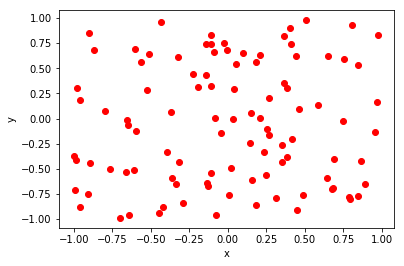

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xes,ys,"ro")
plt.ylabel("y")
plt.xlabel("x")

# Experiment!
Now import a data file with the same data, collected by phys320 students in class on Oct-30

In [4]:
import pandas

In [5]:
data=pandas.read_csv("19_pepper_data.csv")

In [6]:
print(data)

    n_circ  n_edge Unnamed: 2
0       17     6.0         \t
1       79    11.0         \t
2       33     6.0         \t
3       23    15.0         \t
4       29     8.0         \t
5        8     4.0         \t
6        9     0.5         \t
7       17     5.0         \t
8       20    12.0         \t
9       58    30.0         \t
10      57    24.0         \t
11      72    15.0         \t
12      99    31.0         \t
13      73    16.0         \t


In [7]:
# pull the columns out as 1-d arrays
n_edge=data.iloc[:,1].values
n_circ=data.iloc[:,0].values

In [8]:
n_total=n_edge+n_circ

Text(0.5,1,'Class data, 2018-Oct-30')

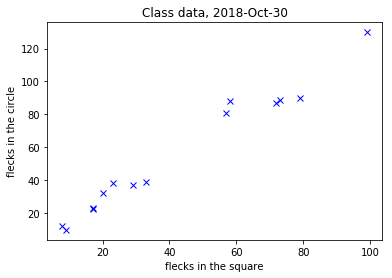

In [9]:
# Now, make a plot of the data from class
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_circ,n_total,"bx")
plt.ylabel("flecks in the circle")
plt.xlabel("flecks in the square")
plt.title("Class data, 2018-Oct-30")

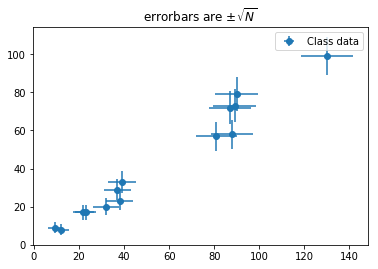

In [10]:
# Using sqrt(counts) as a measure of uncertainty
a=n_circ**0.5
b=n_total**0.5

plt.errorbar(n_total, n_circ, xerr=b, yerr=a,linestyle="",marker="o",label="Class data")
plt.title("errorbars are $\pm \sqrt{N}$")
plt.legend()

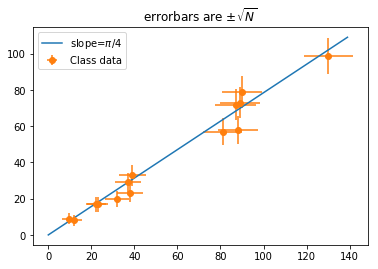

In [11]:
import numpy as np
import math
cx=np.arange(0,140,1)
cy=(math.pi/4)*cx
plt.plot(cx,cy,label="slope=$\pi/4$")

plt.errorbar(n_total, n_circ, xerr=b, yerr=a,linestyle="",marker="o",label="Class data")
plt.title("errorbars are $\pm \sqrt{N}$")
plt.legend()

# Some people asked about a trendline button
A few assignments ago I asked you all to do the thinking behind a least-squares regression.  Here's a nice python package that does the same, but, better than what we derived, it can accommodate uncertainties in both x and y dimensions.

https://docs.scipy.org/doc/scipy/reference/odr.html

In [18]:
from scipy.odr import *

In [19]:
# define the function I want to fit with
# linear
def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

In [20]:
# create a model
linear = Model(f)

# define the data you want to fit - many ways to do this - I'm just going to use error bar weights (standard deviations)
#mydata = RealData(x, y, sx=sx, sy=sy)
mydata = RealData(n_total, n_circ, sx=n_total**0.5, sy=n_circ**0.5)

In [21]:
# Instantiate ODR with your data, model and initial parameter estimate.:
myodr = ODR(mydata, linear, beta0=[0.75, 0])

In [22]:
# run the fit
myoutput = myodr.run()

In [23]:
# look at the output
myoutput.pprint()

Beta: [ 0.77586045 -0.71618042]
Beta Std Error: [0.03676243 1.52075554]
Beta Covariance: [[ 4.05156727e-03 -1.25918657e-01]
 [-1.25918657e-01  6.93319399e+00]]
Residual Variance: 0.33356882912401087
Inverse Condition #: 0.0015950227861081525
Reason(s) for Halting:
  Sum of squares convergence


In [28]:
# what's the slope, intercept
print(myodr.output.beta)
# further output details here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.Output.html#scipy.odr.Output

[ 0.77586045 -0.71618042]


In [30]:
myodr.output.beta[1]

-0.7161804177661818

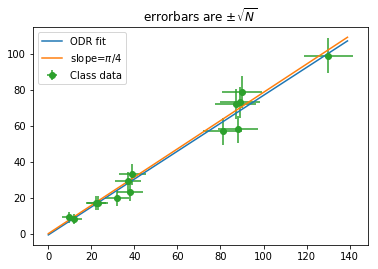

In [31]:
# fx,fy are the fit from odr
fx=np.arange(0,140,1)
fy=myodr.output.beta[0]*cx+myodr.output.beta[1]
plt.plot(fx,fy,label="ODR fit")

plt.plot(cx,cy,label="slope=$\pi/4$")

plt.errorbar(n_total, n_circ, xerr=b, yerr=a,linestyle="",marker="o",label="Class data")
plt.title("errorbars are $\pm \sqrt{N}$")
plt.legend()